## Introduction to scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of scikit-learn

What we are going to cover 

0. an end to end scikit learn flow
1. getting the data ready
2. Choosing the right estimator/Algorithms for our problems
3. fit the model to / algorithm and use it to make predictions
4. evaluate our model
5. improve the model
6. save and load the trained model
7. put it all together

In [1]:
#Lets listify the contents
what_we_are_covering = [
    '0. an end to end scikit learn flow',
    '1. getting the data ready',
    '2. Choosing the right estimator/Algorithms for our problems',
    '3. fit the model to / algorithm and use it to make predictions',
    '4. evaluate our model',
    '5. improve the model',
    '6. save and load the trained model',
    '7. put it all together']

In [2]:
what_we_are_covering

['0. an end to end scikit learn flow',
 '1. getting the data ready',
 '2. Choosing the right estimator/Algorithms for our problems',
 '3. fit the model to / algorithm and use it to make predictions',
 '4. evaluate our model',
 '5. improve the model',
 '6. save and load the trained model',
 '7. put it all together']

In [3]:
#standard import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 0. An end to end scikit learn flow

In [4]:
import numpy as np

In [5]:
# 1. get the data ready 
import pandas as pd
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# create x (features matrix)
x = heart_disease.drop('target',axis=1)

#create y (labels)
y = heart_disease['target']

In [7]:
# 2. Choose the right model and hyperparameters 
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

#We will keep the default hyperparameters 
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [9]:
clf.fit(x_train, y_train);

In [10]:
# make a prediction 
y_preds = clf.predict(x_test)
y_preds

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1])

In [11]:
y_test

29     1
172    0
190    0
268    0
151    1
      ..
176    0
256    0
116    1
273    0
36     1
Name: target, Length: 61, dtype: int64

In [12]:
# 4. Evaluate the Model on the training and the test data
clf.score(x_train, y_train)

1.0

In [13]:
clf.score(x_test, y_test)

0.7868852459016393

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79        30
           1       0.80      0.77      0.79        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [15]:
confusion_matrix(y_test,y_preds)

array([[24,  6],
       [ 7, 24]])

In [16]:
accuracy_score(y_test,y_preds)

0.7868852459016393

In [17]:
# 5. Imporve the model
# try a different number of n_estimators 
np.random.seed(42)
for i in range(10,100,10):
    print(f'trying model with {i} estimators...')
    clf = RandomForestClassifier(n_estimators = i).fit(x_train,y_train)
    print(f"Model accuracy on test set: {clf.score(x_test,y_test)*100:2f}%")
    print('')

trying model with 10 estimators...
Model accuracy on test set: 78.688525%

trying model with 20 estimators...
Model accuracy on test set: 83.606557%

trying model with 30 estimators...
Model accuracy on test set: 81.967213%

trying model with 40 estimators...
Model accuracy on test set: 77.049180%

trying model with 50 estimators...
Model accuracy on test set: 78.688525%

trying model with 60 estimators...
Model accuracy on test set: 77.049180%

trying model with 70 estimators...
Model accuracy on test set: 78.688525%

trying model with 80 estimators...
Model accuracy on test set: 77.049180%

trying model with 90 estimators...
Model accuracy on test set: 78.688525%



In [18]:
# 6. save model and load it
import pickle

pickle.dump(clf,open('random_forest_1.pk1',"wb"))

In [19]:
loaded_model = pickle.load(open('random_forest_1.pk1','rb'))
loaded_model.score(x_test,y_test)

0.7868852459016393

## Getting data ready to be used with machine learning

Three main things we have to do

    1. split the data and features into features and labels (usually `x` and `y`)
    2. filling (also called imputing) or disregarding missing values 
    3. converting non numerical to numerical values (also called feature encoding)

In [20]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [21]:
x = heart_disease.drop('target', axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [23]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y, 
                                                    test_size=0.2)

In [24]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## make sure it is all numerical

In [25]:
car_sales = pd.read_csv('car-sales.csv')

In [26]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [27]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [28]:
car_sales['Price'] = car_sales['Price'].str.replace('[\$\,\.]', '').astype(float).astype(int)

/var/folders/2k/jf917mwj5qn53k_ygc5zs9h40000gn/T/ipykernel_17828/2211181269.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales['Price'] = car_sales['Price'].str.replace('[\$\,\.]', '').astype(float).astype(int)


In [29]:
# Split into x/y 
x = car_sales.drop('Price', axis = 1)
y = car_sales["Price"]

#split into training and test set 
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                   test_size= 0.2)

In [30]:
#build machine learning model 
from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor()
# model.fit(x_train,y_train)
# model.score(x_test,y_test)

In [31]:
#turn categorical features into numerical
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_features)],
                               remainder='passthrough')
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.50043e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 8.78990e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 3.25490e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.11790e+04],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 2.13095e+05],
       [0.00000e+00, 0.00000e+

In [32]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,150043.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,87899.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,32549.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11179.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,213095.0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,99213.0
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,45698.0
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,54738.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,60000.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,31600.0


In [33]:
## lets refit the model
# np.random.seed(42)
# x_train, x_test, y_train, y_test = train_test_split(transformed_x,
#                                                    y,
#                                                    test_size=0.2)
# model.fit(x_train,y_train)

In [34]:
## model.score(x_test,y_test)

## 1.2 What if Missing Values

1. Fill them with some value (also known as imputation)
2. Remove the samples with missing data altogether 

In [35]:
what_we_are_covering

['0. an end to end scikit learn flow',
 '1. getting the data ready',
 '2. Choosing the right estimator/Algorithms for our problems',
 '3. fit the model to / algorithm and use it to make predictions',
 '4. evaluate our model',
 '5. improve the model',
 '6. save and load the trained model',
 '7. put it all together']

## Choosing the right estimator/ Algorithm

some things to note:

* sklearn refers to machine learning algorithms as estimators 
* classification problem - predicting categories (heart disease or not)
    *sometime 'clf' as short for classifyer and this is a classificatino estimator
* regression is predicting a number (sell price of a car)

## 2.1 picking a machine learning  
lets use the California Housing data set

In [36]:
# get California Housing data set
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [37]:
housing_df = pd.DataFrame(housing['data'], columns = housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [38]:
housing_df['target'] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [39]:
# housing_df = housing_df.drop(['MedHouseVal'],axis=1)

In [40]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [41]:
# import algorithm 
from sklearn import linear_model
# set random seed
np.random.seed(42)

#ccreate the data 
x = housing_df.drop(['target'],axis=1)
y = housing_df['target'] #median house value in $100,000

# split into test and train set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#instantiate and fit the model
model = linear_model.Ridge()
model.fit(x_train,y_train)

#check the score of the model
model.score(x_test,y_test)

0.5758549611440125

## Attempt at improving the model

In [42]:
# import algorithm Suport vector machine
from sklearn import svm

# set random seed
np.random.seed(42)

#ccreate the data 
x = housing_df.drop(['target'],axis=1)
y = housing_df['target'] #median house value in $100,000

# split into test and train set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#instantiate and fit the model
model = svm.SVR()
model.fit(x_train,y_train)

#check the score of the model
model.score(x_test,y_test)

-0.01648536010717372

In [43]:
# import algorithm descision tree regressor 
from sklearn.ensemble import RandomForestRegressor 

# set random seed
np.random.seed(42)

#ccreate the data 
x = housing_df.drop(['target'],axis=1)
y = housing_df['target'] #median house value in $100,000

# split into test and train set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#instantiate and fit the model
model = RandomForestRegressor()
model.fit(x_train,y_train)

#check the score of the model
model.score(x_test,y_test)

0.8066196804802649

In [44]:
# import algorithm Lasso
from sklearn import linear_model
# set random seed
np.random.seed(42)

#ccreate the data 
x = housing_df.drop(['target'],axis=1)
y = housing_df['target'] #median house value in $100,000

# split into test and train set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#instantiate and fit the model
model = linear_model.LassoLars()
model.fit(x_train,y_train)

#check the score of the model
model.score(x_test,y_test)

0.2841653734066961

In [45]:
# import algorithm BaysianRidge
from sklearn import linear_model
# set random seed
np.random.seed(42)

#ccreate the data 
x = housing_df.drop(['target'],axis=1)
y = housing_df['target'] #median house value in $100,000

# split into test and train set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#instantiate and fit the model
model = linear_model.BayesianRidge()
model.fit(x_train,y_train)

#check the score of the model
model.score(x_test,y_test)

0.5760206353505533

what if the ridge method didn't work... We can always try a different model 

## Choosing an estimator for classification 
lets go to the map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html 

In [46]:
#import data
breast_cancer = pd.read_csv('breast-cancer-wisconsin.data')
breast_cancer

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [47]:
## 2nd way to import data
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer
breast_cancer

<function sklearn.datasets._base.load_breast_cancer(*, return_X_y=False, as_frame=False)>

In [48]:
breast_cancer_df=breast_cancer(as_frame=True)

In [49]:
type(breast_cancer_df)

sklearn.utils._bunch.Bunch

In [50]:
breast_cancer_df = pd.DataFrame(breast_cancer_df['data'], breast_cancer_df['target'] ,columns = breast_cancer_df['feature_names'])
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [51]:
breast_cancer_df.head(20)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890


## Classification problem

In [52]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


consult the map. says to try `LinearSVC`

In [53]:
##LinearSVC
from sklearn.svm import LinearSVC

##set random seed
np.random.seed(42)

#make the data 
x = heart_disease.drop('target',axis = 1)
y = heart_disease['target']

#split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2)

#train the model
clf = LinearSVC()
clf.fit(x_train, y_train)

#evaluate the linearSVC
clf.score(x_test, y_test)

/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [54]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier

##set random seed
np.random.seed(42)

#make the data 
x = heart_disease.drop('target',axis = 1)
y = heart_disease['target']

#split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2)

#train the model
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

#evaluate the RandomForestClassifier
clf.score(x_test, y_test)

0.8524590163934426

In [55]:
what_we_are_covering

['0. an end to end scikit learn flow',
 '1. getting the data ready',
 '2. Choosing the right estimator/Algorithms for our problems',
 '3. fit the model to / algorithm and use it to make predictions',
 '4. evaluate our model',
 '5. improve the model',
 '6. save and load the trained model',
 '7. put it all together']

## 3. fit the model/algorithm on our data and use it to make predictions
### 3.1 fitting the model to the data

different names for:
* `x` = features,feature, variable, data
* `y` = labels, targets, target variables

In [56]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier

##set random seed
np.random.seed(42)

#make the data 
x = heart_disease.drop('target',axis = 1)
y = heart_disease['target']

#split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2)

#train the model
clf = RandomForestClassifier()

#fit the model tot the data
clf.fit(x_train, y_train)

#evaluate the RandomForestClassifier
clf.score(x_test, y_test)

0.8524590163934426

In [57]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [58]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predictions using Machine learning model
2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [59]:
# Use a trained model to make predictions 
# clf.predict(np.array([1,7,8,3,4])) # this does not work

In [60]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [61]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [62]:
# Compare predictions to truth labels to evaluare rhe model 
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [63]:
 clf.score(x_test, y_test)


0.8524590163934426

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

make preductions with `predict_proba()`

In [65]:
# predict_proba() retirns probabilities of a classificatin label
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [66]:
# LETS `predict()` on the same data
clf.predict(x_test[:5])


array([0, 1, 1, 0, 1])

 `predict()` can also be used for regression models 

In [67]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [68]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data 
x = housing_df.drop('target', axis = 1)
y = housing_df['target']

#split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#create model instance
model = RandomForestRegressor()

#fit th emodel to the data
model.fit(x_train, y_train)

## make predictions 
y_preds = model.predict(x_test)

In [69]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [70]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [71]:
len(y_preds)

4128

In [72]:
len(y_test)

4128

In [73]:
#compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.3265721842781009

In [74]:
housing_df['target']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evvaluating a machine learning model 

three ways to evaluate scikit-learn models.estimators 
    1. estimators built-in `score()` method
    2. the `scoring` parameter
    3. problem-specific metric functions 

### 4.1 Evaluating a model with the `score method 

In [75]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

#create x & y 
x = heart_disease.drop(['target'], axis = 1)
y = heart_disease['target']

#create train/test split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

#create classifier model instance 
model = RandomForestClassifier()
# fit classifier to data
model.fit(x_train,y_train)

RandomForestClassifier()

In [76]:
model.score(x_train, y_train)

1.0

In [77]:
model.score(x_test,y_test)

0.8524590163934426

lets use the `score` method on the regression problem....

In [78]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# create x & y 
x = housing_df.drop('target', axis = 1)
y = housing_df['target']

#split the data 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

#instantiate the model
model_2 = RandomForestRegressor()

## fit the model
model_2.fit(x_train,y_train)

##score the model
print('training score')
model_2.score(x_train,y_train),

training score


(0.9736828565983116,)

In [79]:
print('test score')
model_2.score(x_test,y_test)

test score


0.8066196804802649

## 4.2 Evaluating a model using the `scoring`

In [80]:
from sklearn.model_selection import cross_val_score

np.random.seed(42)

#create x & y 
x = heart_disease.drop(['target'], axis = 1)
y = heart_disease['target']

#create train/test split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

#create classifier model instance 
model = RandomForestClassifier()
# fit classifier to data
model.fit(x_train,y_train);

In [81]:
model.score(x_test,y_test)

0.8524590163934426

In [82]:
cross_val_score(model,x,y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [83]:
np.random.seed(42)

# single training and test split score 
model_single_score = model.score(x_test, y_test)

# take the mean of the 5-fold cross validation score 
model_cross_val_score = np.mean(cross_val_score(model,x,y))

#compare the two
model_single_score, model_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [84]:
# DEFAULT SCORING PARAMETER OF CLASSIFIER = MEAN ACCURACY

In [85]:
#scoring parameter set to none by default
cross_val_score(model,x,y,scoring=None)


array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

## 4.2.1 Classification model evauation metrics

1. Accuracy 
2. Area under ROC curve 
33. Confusion matrix
4. Classification report

Accuracy

In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier 

np.random.seed(42)

x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

model = RandomForestClassifier()
cross_val_score = cross_val_score(model,x,y)

In [87]:
np.mean(cross_val_score)

0.8248087431693989

In [88]:
print(f'Heart Disease Classifier Cross Validated Accuracy : {np.mean(cross_val_score) * 100 :.2f}%')

Heart Disease Classifier Cross Validated Accuracy : 82.48%


** Area under the receiver operating characteristic curv (AUC/ROC) **
* are under curve
* ROC curve

ROC curves are a comparison of a model's true positive rate tpr versuses a model's false positve rate fpr

* True positive = model predicts 1 whne truth is 1
* False positve - model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* false negative = model predicts 0 when truth is 1

In [89]:
# create x_test ...ect
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [90]:
from sklearn.metrics import roc_curve 
# fit the data 
model.fit(x_train,y_train)

# make predictions with probabiliteis 
y_probs = model.predict_proba(x_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [91]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [92]:
#calculate fpr,tpr and thresholds 
fpr,tpr, thresholds = roc_curve(y_test, y_probs_positive)

#check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

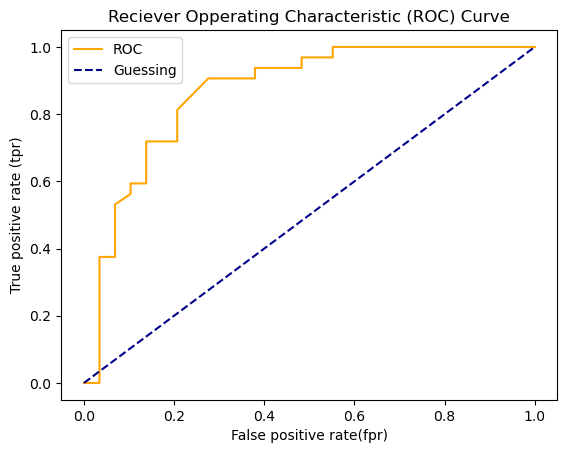

In [93]:
# create a functin for plotting ROC curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve giving the false positve ratr(FPR) and true positve rate (tpr) of a model
    """
    # Plot roc curve 
    plt.plot(fpr,tpr,color='orange', label="ROC")
    #plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='Guessing')
    
    ##customize the plot
    plt.xlabel('False positive rate(fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Reciever Opperating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
    
plot_roc_curve(fpr,tpr)

In [94]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)


0.8669181034482759

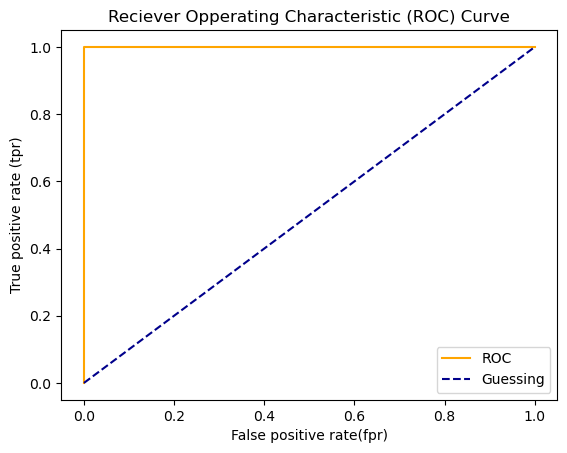

In [95]:
#plot perfect ROC curve and AUC score
fpr,tpr,thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [96]:
# perfect AUC score
roc_auc_score(y_test,y_test)

1.0

**Confusion matrix** 

A confusion matrix is a quick way to compare the labels a model predicsts and the actual labels it was supposed to predict 

In essance, giving you an idea of where the model is getting confused 

In [97]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(x_test)

confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]])

In [98]:
pd.crosstab(y_test,
           y_preds,
           rownames=['Actual Labels'],
           colnames=['Predicted labels'])

Predicted labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [99]:
# How to install a conda package into the current environment from a jupyter notebook 
import sys 
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.3.1



# All requested packages already installed.



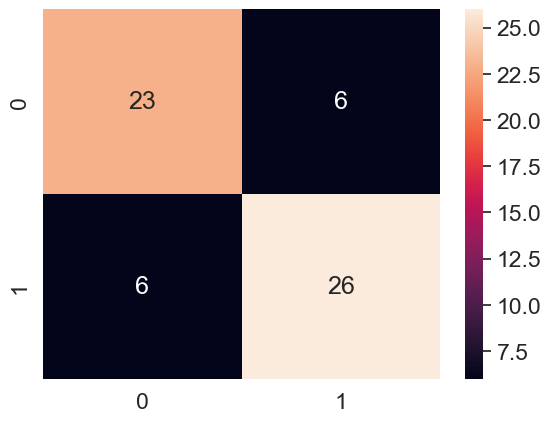

In [100]:
# make our heat map more visual with seaborn heatmap()
import seaborn as sns

## set the font scale 
sns.set(font_scale=1.5)

# create a confusion matrix 
conf_mat = confusion_matrix(y_test, y_preds)

#plot using Seaborn 
sns.heatmap(conf_mat,annot=True);

In [101]:
import sklearn
sklearn.__version__

'1.2.1'

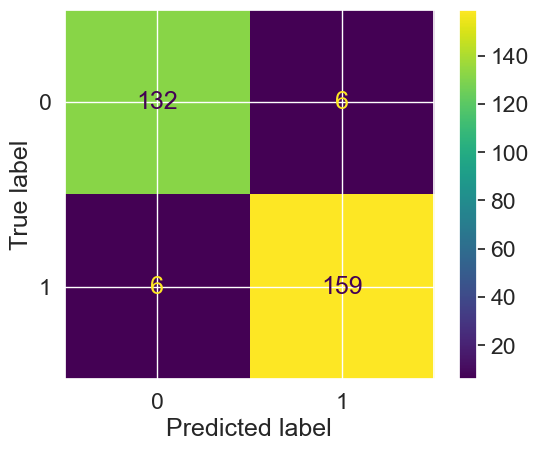

In [102]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=model, X=x, y=y)

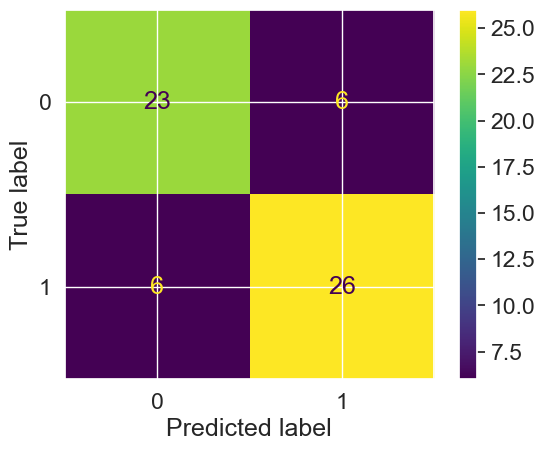

In [103]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=y_preds);

**Classification report**

In [104]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [105]:
## where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 #only one positive 

disease_preds = np.zeros(10000) #model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))



/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


#### 4.2.2 Regression Model evaulation metrics 

Model evaluation documentation 
The ones covered 
1. R^2 or coeficient of determination 
2. Man absolute error (MAE)
3. Mean squared error (MSE)

In [106]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop('target', axis=1)
y = housing_df['target']

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [107]:
model.score(x_test,y_test)

0.8066196804802649

In [108]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [109]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [110]:
y_test.mean()

2.0550030959302323

In [111]:
from sklearn.metrics import r2_score 

# fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [112]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [113]:
r2_score(y_true=y_test,
        y_pred=y_test_mean)

0.0

In [114]:
r2_score(y_true=y_test,
        y_pred=y_test)

1.0

**mean Absolute error (MAE)**

MAE is the average of the absolute defferences between predictions and actual values. It gives you an idea of how wrong your models predictions are

In [115]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3265721842781009

In [116]:
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [117]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [118]:
df = pd.DataFrame(data={'actual values':y_test,
                       'predicted values': y_preds})
df['differences'] = df['predicted values'] - df['actual values']
df.head()

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240


In [119]:
df['differences'].mean()

0.0121069218749996

In [120]:
# formula for MAE
np.abs(df['differences']).mean()

0.3265721842781009

**Mean Squared Error (MSE)**

MSE is the mean of the square of the values between actual and the predicted values

In [121]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534073069137548

In [122]:
df['squared_differences'] = np.square(df['differences'])

In [123]:
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [124]:
# calculate MSE by hand
squared = np.square(df['differences'])
squared.mean()

0.2534073069137548

In [125]:
df_large_error = df.copy()
df_large_error.iloc[0]['squared_differences'] = 16

In [126]:
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [127]:
# calculate MSE with large error
df_large_error['squared_differences'].mean()

0.25728320720794084

In [128]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [129]:
# calculate MSE with large error
df_large_error['squared_differences'].mean()

0.7333540351264799

# 4.2.3 Finally using the `scoring` parameter

In [130]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x= heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()

In [131]:
np.random.seed(42)

#cross-validation accuracy
cv_acc = cross_val_score(clf, x, y, cv=5, scoring=None) #if scoring=None, default scoring is used, classification is accuracy
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [132]:
# Cross-validated accuracy 
print(f"The cross validated accuracy is: {np.mean(cv_acc)* 100:.2f}%")

The cross validated accuracy is: 82.48%


In [133]:
#precision
np.random.seed(42)
cv_precision = cross_val_score(clf, x, y, cv=5, scoring='precision') 
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [134]:
print(f"The cross validated precision is: {np.mean(cv_precision)}")

The cross validated precision is: 0.8329547346025924


In [135]:
# recall
np.random.seed(42)
cv_recall = cross_val_score(clf, x, y, cv=5, scoring='recall')
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [136]:
print(f"The cross validated recall is: {np.mean(cv_recall)}")

The cross validated recall is: 0.8545454545454545


let's see the `scoring` parameter being used for a regression problem...

In [137]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop('target', axis = 1)
y = housing_df['target']

model = RandomForestRegressor()

In [138]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x, y, cv=3, scoring=None)
np.mean(cv_r2)

0.6545756342466266

In [139]:
cv_r2

array([0.62159677, 0.72076221, 0.62136792])

In [140]:
# Mean squared error close to 0 best
np.random.seed(42)
cv_mse = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
np.mean(cv_mse)

-0.43011254261460774

In [141]:
cv_mse

array([-0.51906307, -0.34788294, -0.37112854, -0.44980156, -0.4626866 ])

In [142]:
# Mean Absoulte error close to 0 is best
cv_mae = cross_val_score(model, x, y, cv=5, scoring='neg_mean_absolute_error')
np.mean(cv_mae)

-0.4657152186918606

In [143]:
cv_mae

array([-0.53907598, -0.41186259, -0.43888317, -0.464205  , -0.47454934])

## 4.3 Using differenct evaluation metrics as Scikit-Learn fucntions 

the 3rd way to evaluate scikit-learn machine learning models/estimators is to use the `sklearn.metrics`

In [144]:
# for classification model
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np. random.seed(42)

#create x & y
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# create model 
clf = RandomForestClassifier()

# fit model 
clf.fit(x_train,y_train)
# make predictions 
y_preds = clf.predict(x_test)

# evaluate model
print('Classifier metrics on the test set')
print(f'accuracy: {accuracy_score(y_test, clf.predict(x_test))*100:.2f}%')#should be the same as below
print(f'accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%')#should be the same as above
print(f'precesion: {precision_score(y_test, y_preds)}')
print(f'recall: {recall_score(y_test, y_preds)}')
print(f'f1: {f1_score(y_test, y_preds)}')


Classifier metrics on the test set
accuracy: 85.25%
accuracy: 85.25%
precesion: 0.8484848484848485
recall: 0.875
f1: 0.8615384615384615


In [145]:
# for regression model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)
# create x & y
x = housing_df.drop('target', axis = 1)
y = housing_df['target']

#split data
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#create model
model = RandomForestRegressor()

#fit model
model.fit(x_train,y_train)

#make predictions 
y_preds= model.predict(x_test)

#evaluate model 
print('regression metrics on the test set')
print(f'r2: {r2_score(y_test, y_preds)}')
print(f'mean absolute error (mae): {mean_absolute_error(y_test,y_preds)}')
print(f'mean squared error (mse): {mean_squared_error(y_test,y_preds)}')

regression metrics on the test set
r2: 0.8066196804802649
mean absolute error (mae): 0.3265721842781009
mean squared error (mse): 0.2534073069137548


In [146]:
what_we_are_covering

['0. an end to end scikit learn flow',
 '1. getting the data ready',
 '2. Choosing the right estimator/Algorithms for our problems',
 '3. fit the model to / algorithm and use it to make predictions',
 '4. evaluate our model',
 '5. improve the model',
 '6. save and load the trained model',
 '7. put it all together']

## 5 Improving a model

first predictions = baseline predictions
first model = baseline model

from a data perspective :
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data? 


from a model perspective:
* Is there a better model that we can use? 
* Could we improve the current model? 
### Hyperparameters vs. parameters
parameters = model find these patterns in data
Hyperparameters = setting on a model you can adjust to (potentially) imporove it's ability to find patterns.

### Three ways to adjust Hyperparameters:
1. by hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV


In [147]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [148]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tunning Hyperparameters by hand 

Let's make three sets Training, Validation and test

In [149]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We are going to try and adjusts:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [150]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {'accuracy': round(accuracy,2),
                  'precision': round(precision,2),
                  'recall': round(recall,2),
                  'f1': round(f1,2)}
    print(f"acc: {accuracy * 100:.2f}%")
    print(f'Precision: {precision:.2f}')
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict
        

In [151]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#shuffle the data 
heart_disease_shuffled = heart_disease.sample(frac=1)

#split into x and y 
x = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled['target']

#split into train, validation and test
train_split = round(0.7 * len(heart_disease_shuffled)) ## 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) #15% of data 
x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[:valid_split]

clf = RandomForestClassifier()
clf.fit(x_train,y_train)
# maake baseline predictions 
y_preds = clf.predict(x_valid)

#evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [152]:
np.random.seed(42)

# create second classifier with different hyperparameters 
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(x_train,y_train)

#make rpedictions with different hyperparamters 
y_preds_2 = clf_2.predict(x_valid)

#evaluate the 2nd cclassifier 
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


In [153]:
clf_3 = RandomForestClassifier(n_estimators = 100,
                               max_depth = 10)
clf_3.fit(x_train,y_train)

#make rpedictions with different hyperparamters 
y_preds_3 = clf_3.predict(x_valid)

#evaluate the 2nd cclassifier 
clf_3_metrics = evaluate_preds(y_valid, y_preds_3)

acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


### 5.2 Hyperparameter tunning with RandomizedSearchCV

In [154]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators': [10,100,200,500,1000,1200],
       'max_depth': [ None, 5, 10,20, 30],
       'max_features': ['auto', 'sqrt'],
       'min_samples_split': [2,4,6],
       'min_samples_leaf': [1,2,4]}

np.random.seed(42)

# split into x and y 
x = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled['target']

#split into train and test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

#instantiate RandomForestClassifier 
clf = RandomForestClassifier(n_jobs=1)

#set up RandomizedSearchCV
rs_clf =RandomizedSearchCV(estimator=clf,
                          param_distributions =grid,
                          n_iter=10, #number of models to try
                          cv=5,
                          verbose=2)
# Fit the randomizedSearchCv version of clf
rs_clf.fit(x_train,y_train);


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, expli

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None,

/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.3s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.4s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.3s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.3s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.8s


In [155]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [156]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(x_test)

#evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


### 5.33 hyperparameter tunning with GridSeachCV

In [157]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [158]:
# reduce the parameters using the best random ones from before to lower the processing load
grid_2 = {'n_estimators': [100, 200, 500],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}

In [159]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

# split into x and y 
x = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled['target']

#split into train and test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

#instantiate RandomForestClassifier 
clf = RandomForestClassifier(n_jobs=1)

#set up GridSearchCv
gs_clf = GridSearchCV(estimator=clf,
                      param_grid = grid_2,
                      cv=5,
                      verbose=2)
# Fit the GridSearch version of clf
gs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.8s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.8s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.8s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.8s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.4s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.4s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.9s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.0s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.5s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.0s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.7s
[CV] END max_depth=None,

In [160]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [161]:
gs_y_preds = gs_clf.predict(x_test)

#evaluate the predictions 
gs_metrics = evaluate_preds(y_test,gs_y_preds)

acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


let's compare our different models metrics

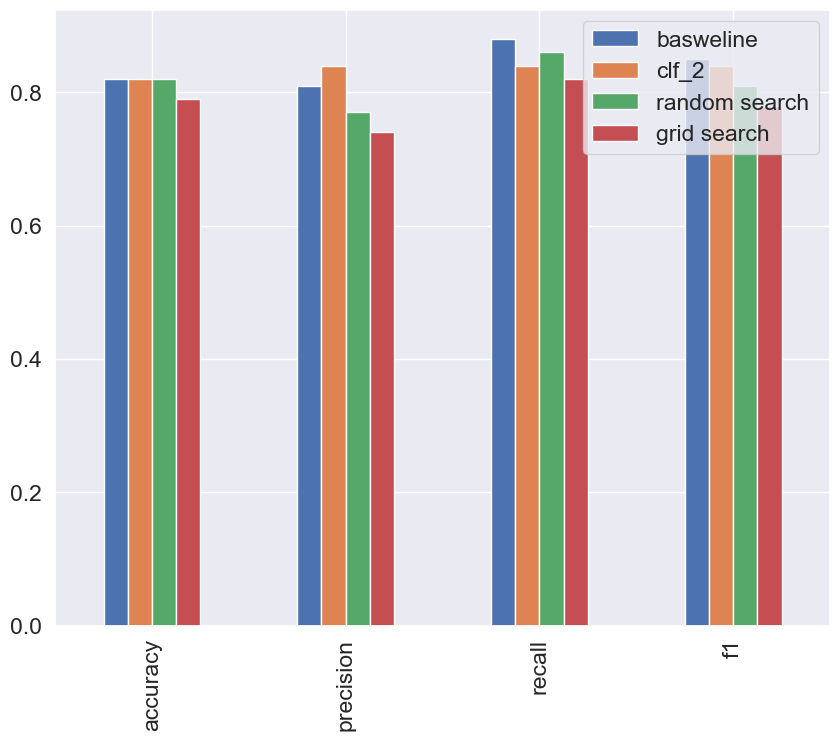

In [162]:
#these comparisons aren't great. Not all models were trained on ther same data
compare_metrics = pd.DataFrame({'basweline':baseline_metrics,
                               'clf_2' :clf_2_metrics,
                               'random search': rs_metrics,
                               'grid search': gs_metrics})
compare_metrics.plot.bar(figsize=(10,8));

In [163]:
what_we_are_covering

['0. an end to end scikit learn flow',
 '1. getting the data ready',
 '2. Choosing the right estimator/Algorithms for our problems',
 '3. fit the model to / algorithm and use it to make predictions',
 '4. evaluate our model',
 '5. improve the model',
 '6. save and load the trained model',
 '7. put it all together']

## 6. Saving and loading trained machine learning models 

two ways to save and load machine learning models:
    1. with pythons `pickle` module 
    2. with the `job1lib`
    module 
    
    **Pickle**


In [164]:
import pickle

# save an existing model to file
pickle.dump(gs_clf,open('gs_random_forest_model_1.pkl', 'wb'))

In [165]:
#load saved model
loaded_pickle_model = pickle.load(open('gs_random_forest_model_1.pkl', 'rb'))

In [166]:
#make some predictions 
pickle_y_preds = loaded_pickle_model.predict(x_test)
evaluate_preds(y_test, pickle_y_preds)

acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

**Joblib**

In [167]:
from joblib import dump,load

##save model to file 
dump(gs_clf,filename='gs_random_forest_model_1.joblib')

['gs_random_forest_model_1.joblib']

In [168]:
#import a saved joblib model
loaded_joblib_model = load(filename='gs_random_forest_model_1.joblib')

In [169]:
# make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

In [170]:
what_we_are_covering

['0. an end to end scikit learn flow',
 '1. getting the data ready',
 '2. Choosing the right estimator/Algorithms for our problems',
 '3. fit the model to / algorithm and use it to make predictions',
 '4. evaluate our model',
 '5. improve the model',
 '6. save and load the trained model',
 '7. put it all together']

###  7. Putting it all together!

In [171]:
data= pd.read_csv('car-sales-missing-data.csv')
data

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [172]:
data.dtypes

Make         object
Colour       object
Odometer    float64
Doors       float64
Price        object
dtype: object

In [173]:
data.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

steps we want to do (all in onecell):

    1. fill missing data
    2. convert dta to numbers
    3.build model on data

In [180]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# E=Setup random seed
import numpy as np
np.random.seed(42)

# Imoprt data and drop rows with missing labels 
data = pd.read_csv('car-sales-extended-missing-data.csv')
data.dropna(subset=['Price'], inplace=True)

# Define different features and transformer pipeline
categorical_features = ['Make', 'Colour']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

door_feature = ['Doors']
door_transformer = Pipeline(steps= [
    ('Imputer', SimpleImputer(strategy='constant', fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# set up preprocessing steps (fill missing data, then conver to numbers)
preprocessor = ColumnTransformer(
                    transformers= [ 
                        ('cat', categorical_transformer, categorical_features),
                        ('door', door_transformer, door_feature),
                        ('num', numeric_transformer, numeric_features)
                    ])

# create a preprocessing and modeling pipeline 
model = Pipeline(steps=[('preprocessor',preprocessor),
                       ('model', RandomForestRegressor())])

#split the data
x = data.drop('Price', axis= 1)
y = data['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# fit and score the model
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.22188417408787875

it's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`

In [183]:
# Use GridSearchCv with our regression PipeLine
pipe_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'model__n_estimators' : [100,1000],
    'model__max_depth':[None, 5],
    'model__max_features': ['auto'],
    'model__min_samples_split':[2,4]
}

gs_model = GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.6s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.8s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.5s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.4s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   3.4s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.5s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   3.2s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   3.7s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.8s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.8s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.6s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.8s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.7s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.7s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.6s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.9s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.5s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.8s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   3.3s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.2s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.2s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.1s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.1s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.9s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.6s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.6s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.6s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.0s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.6s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.6s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.6s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.7s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.6s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.6s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.6s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.6s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.6s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.6s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.7s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.6s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.6s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.6s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.9s


/Users/kolegraham/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('Imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['auto'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [184]:
gs_model.score(x_test,y_test)

0.3339554263158365

In [186]:
what_we_covered = what_we_are_covering
what_we_covered

['0. an end to end scikit learn flow',
 '1. getting the data ready',
 '2. Choosing the right estimator/Algorithms for our problems',
 '3. fit the model to / algorithm and use it to make predictions',
 '4. evaluate our model',
 '5. improve the model',
 '6. save and load the trained model',
 '7. put it all together']